<div> <h1> <span style="color:brown"> Please give an upvote if you liked the notebook🙌</span></h1></div>

<div> <h1> <span style="color:Gray"> Vehicle Insurance Predictions 📊🚗📉</span></h1></div>

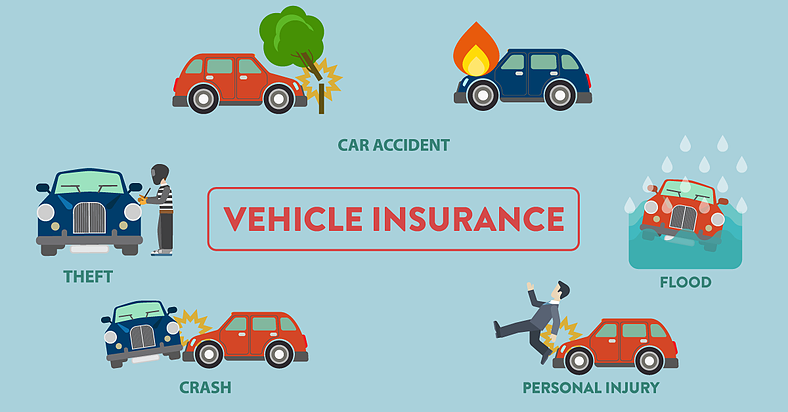

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Menu</h3>

  
<font color="blue" size=+1><b>Plots</b></font>
* [1. Correllogram](#1)
* [2. Pair Plots](#2)
* [3. Density plots](#3)
* [4. Bar graph](#4)
* [5. Box plots](#5)
* [6. Violin plots](#6)
* [7. Pie chart](#7)
* [8. Simple plots](#8)
* [9,Double bar  graph](#9)

<font color="red" size=+1><b>ML models</b></font>
* [10. Logistic_Regression](#10)


In [ ]:
import sys
import random
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib import style 
style.use('fivethirtyeight')
import pandas as pd 
import numpy as np 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
ss= StandardScaler()

In [ ]:
train_df = pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
test_df = pd.read_csv('../input/health-insurance-cross-sell-prediction/test.csv')
sample_df = pd.read_csv('../input/health-insurance-cross-sell-prediction/sample_submission.csv')

In [ ]:
train_df.head()

In [ ]:
train_df.describe()

In [ ]:
train_df.isna().count()

# data visualization

<a id="1"></a>
<font color="gray" size=+1.0><b>1.Correllelogram</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def correllogram(df):
    fig  = plt.figure(figsize=(10,8),dpi=80)
    cols = df.columns
    sns.heatmap(df.corr(),xticklabels=cols,yticklabels=cols,
                cmap='RdYlGn',center=0,annot=True)
    
    plt.show()
correllogram(train_df)

<a id="2"></a>
<font color="gray" size=+1.0><b>2. Pair_plots</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def pairplots(df):
#     fig = plt.figure(figsize=(10,8))
    cols = ['Age','Region_Code','Annual_Premium','Policy_Sales_Channel','Response']
    sns.pairplot(df[cols],kind='scatter',height=2.5)
    plt.tight_layout()
    plt.show()
pairplots(train_df)

<a id="3"></a>
<font color="gray" size=+1.0><b>3. Density_plots</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def density_plot(df):
    plt.figure(figsize=(10,4))
#     sns.kdeplot(df.loc[df['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
    sns.kdeplot(df.loc[df['Annual_Premium']>25000.0,'Annual_Premium'],shade=True, color="g", label="premium>25000", alpha=.7)
    sns.kdeplot(df.loc[df['Annual_Premium']>50000.0,'Annual_Premium'],shade=True, color="r", label="premium>50000", alpha=.7)
    sns.kdeplot(df.loc[df['Annual_Premium']>75000.0,'Annual_Premium'],shade=True, color="b", label="premium>75000", alpha=.7)
    sns.kdeplot(df.loc[df['Annual_Premium']>100000.0,'Annual_Premium'],shade=True, color="y", label="premium>100000", alpha=.7)
    plt.show()
    
# 
density_plot(train_df)

<a id="4"></a>
<font color="gray" size=+1.0><b>4. Bar-Graph</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def bar_graph(df):
    plt.figure(figsize=(12,6))
    df['age_cut'] = pd.cut(df['Age'],bins=10)
    y= df.groupby(['age_cut']).count()
    x = [i for i in range(10)]
    labels = [y.index[i] for i in range(len(y.index))]
    plt.bar(x,y['Gender'].values)
    plt.xlabel("Age Group",fontsize=12)
    plt.ylabel('Count of Age Group',fontsize=12)
    plt.xticks(x,labels,fontsize=12,rotation=45)
    plt.show()
    
bar_graph(train_df)

<a id="5"></a>
<font color="gray" size=+1.0><b>5. Box_Plots</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def box_plots(df):
    style.use('seaborn')
    sns.boxplot(x='age_cut',y='Annual_Premium',data=df,notch=False)
    plt.xticks(rotation=45)
    plt.figure(figsize=(10,6))
box_plots(train_df)

<a id="6"></a>
<font color="gray" size=+1.0><b>6. Violin Plots
    </b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def violin_plots(df):
    plt.figure(figsize=(10,8))
    sns.violinplot(x='age_cut',y='Annual_Premium',data=df,scale='width',inner='quartile')
    plt.show()
violin_plots(train_df)

<a id="7"></a>
<font color="gray" size=+1.0><b>7. Pie_chart</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def pie_chart(df):
    style.use('ggplot')
    fig,axes= plt.subplots(1,2)
    labels= train_df.groupby(['Gender']).sum()
    axes[0].pie(labels['Annual_Premium'].values,labels=['Male','Female'])
    axes[1].bar([1],labels['Response'][0])
    axes[1].bar([2],labels['Response'][1])
    axes[1].legend(['Female','Male'])
    axes[0].set_xlabel('Annual_Premium_Distribution')
    axes[1].set_xlabel('Respone_across_Gender')
    plt.show()
pie_chart(train_df)

<a id="8"></a>
<font color="gray" size=+1.0><b>8. Simple_plot</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def simple_plot(df):
    y =df.groupby(['age_cut']).mean()
    x =[x for x in range(len(df.groupby(['age_cut'])))]
    plt.plot(x,y['Annual_Premium'].values)
    plt.xticks(x,y.index,rotation=45)
    plt.xlabel('Age_Group')
    plt.ylabel(['Mean_Annual_Premium'])
    plt.show()
simple_plot(train_df)

<a id="9"></a>
<font color="gray" size=+1.0><b>9. double_bar_graph</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
def double_bar_graph(df):
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_axes([0,0,1,1])
    
    y = df.groupby(['age_cut']).mean()
    x = np.arange(len(y))
    ax.bar(x+0.0,y['Previously_Insured'].values,color='red',width=0.25)
    ax.bar(x+0.25,y['Response'].values,color='g',width=0.25)
    plt.xlabel("Previously_Insured")
    plt.xticks(x,y.index)
    plt.ylabel("Response")
    plt.show()
double_bar_graph(train_df)

# Data_cleansing

In [ ]:
train_df = pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')
le =LabelEncoder()
ss =StandardScaler()

In [ ]:
def data_cleansing(df):
    df.drop(['id'],1,inplace=True)
    vehicle_age = {'< 1 Year': 0,'1-2 Year': 1,'> 2 Years': 2}
    df['Vehicle_Age'] = df['Vehicle_Age'].map(vehicle_age)
    df['Gender'] =  le.fit_transform(df['Gender'])
    df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])
    return df
train_df =data_cleansing(train_df)

In [ ]:
X,y = train_df.drop(['Response'],1),train_df['Response']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

# Data Prediction

<a id="10"></a>
<font color="gray" size=+1.0><b>10. Logistic_regression</b></font>

<a href="#top" class="btn btn-primary btn-sm"  aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to menu</a>

In [ ]:
LR  = LogisticRegression()
LR.fit(X_train,y_train)
score= LR.score(X_test,y_test)
print(score)

In [ ]:
predictions = LR.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

<div> <h1> <span style='color:brown'> Thank you!!! </span> </h1> </div>